# Part 1: Classification


1. Load "ModifiedEdibleMushroom.csv" data from the link below (note: this data set has been preliminarily prepared.).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql


In [2]:
df = pd.read_csv('hed2020_dataset.csv', sep=',')
df.head()


,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5824 non-null   int64  
 1   label                        5764 non-null   object 
 2   cap-shape                    5824 non-null   object 
 3   cap-surface                  5797 non-null   object 
 4   bruises                      5725 non-null   object 
 5   odor                         5725 non-null   object 
 6   gill-attachment              5725 non-null   object 
 7   gill-spacing                 5694 non-null   object 
 8   gill-size                    5703 non-null   object 
 9   stalk-shape                  5703 non-null   object 
 10  stalk-root                   5793 non-null   object 
 11  stalk-surface-above-ring     5793 non-null   object 
 12  stalk-surface-below-ring     5793 non-null   object 
 13  veil-type         

2. Drop rows where the target (label) variable is missing.


In [4]:
df.dropna(subset=['label'], inplace=True)
df


,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,5820,e,k,s,f,n,a,c,b,e,...,o,p,b,c,l,1.0,10.0,2.0,7.0,8.0
5820,5821,e,x,s,f,n,a,c,b,e,...,o,p,b,v,l,1.0,10.0,1.0,7.0,8.0
5821,5822,e,f,s,f,n,a,c,b,e,...,o,p,b,c,l,1.0,1.0,2.0,7.0,8.0
5822,5823,p,k,y,f,y,f,c,n,t,...,o,e,w,v,l,1.0,9.0,1.0,1.0,1.0


3. Drop the following variables:


In [5]:
drop_cols = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color-rate', 'stalk-root', 'stalk-surface-above-ring',
             'stalk-surface-below-ring', 'stalk-color-above-ring-rate', 'stalk-color-below-ring-rate', 'veil-color-rate', 'veil-type']

df = df.drop(drop_cols, axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 0 to 5823
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5764 non-null   int64  
 1   label              5764 non-null   object 
 2   cap-shape          5764 non-null   object 
 3   cap-surface        5737 non-null   object 
 4   bruises            5665 non-null   object 
 5   odor               5665 non-null   object 
 6   stalk-shape        5643 non-null   object 
 7   ring-number        5702 non-null   object 
 8   ring-type          5702 non-null   object 
 9   spore-print-color  5708 non-null   object 
 10  population         5708 non-null   object 
 11  habitat            5733 non-null   object 
 12  cap-color-rate     5737 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 630.4+ KB


4. Examine the number of rows, the number of digits, and whether any are missing.


In [6]:
df


,id,label,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate
0,1,p,x,s,t,p,e,o,p,k,s,u,1.0
1,2,e,x,s,t,a,e,o,p,n,n,g,2.0
2,3,e,b,s,t,l,e,o,p,n,n,m,3.0
3,4,p,x,y,t,p,e,o,p,k,s,u,3.0
4,5,e,x,s,f,n,t,o,e,n,a,g,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,5820,e,k,s,f,n,e,o,p,b,c,l,1.0
5820,5821,e,x,s,f,n,e,o,p,b,v,l,1.0
5821,5822,e,f,s,f,n,e,o,p,b,c,l,1.0
5822,5823,p,k,y,f,y,t,o,e,w,v,l,1.0


In [7]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
id                     0
label                  0
cap-shape              0
cap-surface           27
bruises               99
odor                  99
stalk-shape          121
ring-number           62
ring-type             62
spore-print-color     56
population            56
habitat               31
cap-color-rate        27
dtype: int64


5. Fill missing values by adding the mean for numeric variables and the mode for nominal variables.


In [8]:
df.fillna(df.mean(), inplace=True)

null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
id                     0
label                  0
cap-shape              0
cap-surface           27
bruises               99
odor                  99
stalk-shape          121
ring-number           62
ring-type             62
spore-print-color     56
population            56
habitat               31
cap-color-rate         0
dtype: int64


C:\Users\Thanin\AppData\Local\Temp/ipykernel_14620/887198315.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [9]:
df.fillna(df.mode().iloc[0], inplace=True)

null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
id                   0
label                0
cap-shape            0
cap-surface          0
bruises              0
odor                 0
stalk-shape          0
ring-number          0
ring-type            0
spore-print-color    0
population           0
habitat              0
cap-color-rate       0
dtype: int64


6. Convert the label variable e (edible) to 1 and p (poisonous) to 0 and check the quantity. class0: class1


In [10]:
df["label"].value_counts()


p    3660
e    2104
Name: label, dtype: int64

In [11]:
new_label = {"e": 1, "p": 0}
df.replace({"label": new_label}, inplace=True)


In [12]:
df["label"].value_counts()


0    3660
1    2104
Name: label, dtype: int64

7. Convert the nominal variable to numeric using a dummy code with drop_first = True.


In [13]:
cat_cols = ['cap-shape', "cap-surface", "bruises", "odor", "stalk-shape",
            "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
df_with_dummy = pd.get_dummies(df[cat_cols], drop_first=True)
df_with_dummy = pd.concat([df, df_with_dummy], axis=1)
df_with_dummy = df_with_dummy.drop(cat_cols, axis=1)
df = df_with_dummy


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 0 to 5823
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5764 non-null   int64  
 1   label                5764 non-null   int64  
 2   cap-color-rate       5764 non-null   float64
 3   cap-shape_c          5764 non-null   uint8  
 4   cap-shape_f          5764 non-null   uint8  
 5   cap-shape_k          5764 non-null   uint8  
 6   cap-shape_x          5764 non-null   uint8  
 7   cap-surface_g        5764 non-null   uint8  
 8   cap-surface_s        5764 non-null   uint8  
 9   cap-surface_y        5764 non-null   uint8  
 10  bruises_t            5764 non-null   uint8  
 11  odor_c               5764 non-null   uint8  
 12  odor_f               5764 non-null   uint8  
 13  odor_l               5764 non-null   uint8  
 14  odor_m               5764 non-null   uint8  
 15  odor_n               5764 non-null   u

8. Split train/test with 20% test, stratify, and seed = 2020.

In [15]:
from sklearn.model_selection import train_test_split

df.drop("id", axis=1, inplace=True)

y = df.pop('label')
X = df
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=2020)


In [16]:
X_train.shape


(4611, 42)

In [17]:
X_test.shape


(1153, 42)

9. Create a Random Forest with GridSearch on training data with 5 CV, random state 2020.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=2020)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 6],
    'min_samples_leaf': [2, 5, 10],
    'n_estimators': [100, 200]
}


In [19]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2020),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 6], 'min_samples_leaf': [2, 5, 10],
                         'n_estimators': [100, 200]})

In [20]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'n_estimators': 100}

10. Predict the testing data set with confusion_matrix and classification_report.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = CV_rfc.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9932    0.9986    0.9959       732
           1     0.9976    0.9881    0.9928       421

    accuracy                         0.9948      1153
   macro avg     0.9954    0.9934    0.9944      1153
weighted avg     0.9948    0.9948    0.9948      1153

[[731   1]
 [  5 416]]


# Part 2: Clustering

11. Load the "ModifiedEdibleMushroom.csv" data from the link below (note: this data set has been preliminarily prepared.) again.

In [22]:
df2 = pd.read_csv('hed2020_dataset.csv', sep=',')
df2


,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,5820,e,k,s,f,n,a,c,b,e,...,o,p,b,c,l,1.0,10.0,2.0,7.0,8.0
5820,5821,e,x,s,f,n,a,c,b,e,...,o,p,b,v,l,1.0,10.0,1.0,7.0,8.0
5821,5822,e,f,s,f,n,a,c,b,e,...,o,p,b,c,l,1.0,1.0,2.0,7.0,8.0
5822,5823,p,k,y,f,y,f,c,n,t,...,o,e,w,v,l,1.0,9.0,1.0,1.0,1.0


12. Choose edible mushrooms only.



In [23]:
df2 = df2[df2["label"] == "e"]
df2

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0
5,6,e,x,y,t,a,f,c,b,e,...,o,p,k,n,g,2.0,1.0,1.0,1.0,1.0
6,7,e,b,s,t,a,f,c,b,e,...,o,p,k,n,m,3.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,5816,e,x,s,f,n,a,c,b,e,...,o,p,o,v,l,1.0,10.0,2.0,7.0,8.0
5819,5820,e,k,s,f,n,a,c,b,e,...,o,p,b,c,l,1.0,10.0,2.0,7.0,8.0
5820,5821,e,x,s,f,n,a,c,b,e,...,o,p,b,v,l,1.0,10.0,1.0,7.0,8.0
5821,5822,e,f,s,f,n,a,c,b,e,...,o,p,b,c,l,1.0,1.0,2.0,7.0,8.0


13.  Only the variables below have been selected to describe the distinctive characteristics of edible mushrooms

In [24]:
df2 = df2[['cap-color-rate','stalk-color-above-ring-rate']]
df2

,cap-color-rate,stalk-color-above-ring-rate
1,2.0,1.0
2,3.0,1.0
4,4.0,1.0
5,2.0,1.0
6,3.0,1.0
...,...,...
5815,1.0,7.0
5819,1.0,7.0
5820,1.0,7.0
5821,1.0,7.0


In [25]:
null_counts = df2.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
cap-color-rate                  6
stalk-color-above-ring-rate    28
dtype: int64


In [26]:
df2.fillna(df2.mean(), inplace=True)

null_counts = df2.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
cap-color-rate                 0
stalk-color-above-ring-rate    0
dtype: int64


C:\Users\Thanin\AppData\Local\Temp/ipykernel_14620/3894719833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(df2.mean(), inplace=True)


14. K-means clustering with 5 clusters and seed = 2020.



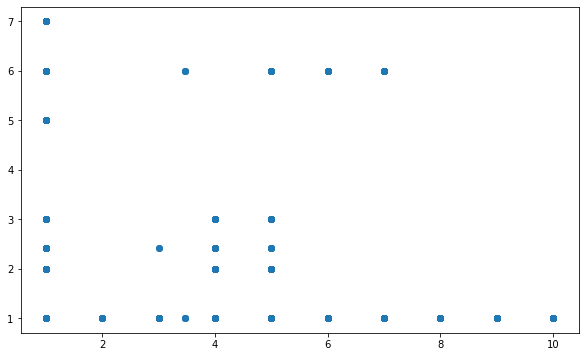

In [27]:
f, ax1 = plt.subplots(1, sharey=True,figsize=(10,6))
plt.scatter(df2["cap-color-rate"],df2["stalk-color-above-ring-rate"],cmap='rainbow')

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=2020)
kmeans.fit(df2)

KMeans(n_clusters=5, random_state=2020)

15. Show the centroid of each cluster.

In [29]:
kmeans.cluster_centers_

array([[1.01351351, 1.85661095],
       [4.22127072, 1.31912479],
       [1.03163575, 6.75213675],
       [4.81717452, 3.57355131],
       [8.47126437, 1.        ]])

In [30]:
mean_x = kmeans.cluster_centers_[:,0]
mean_y = kmeans.cluster_centers_[:,1]

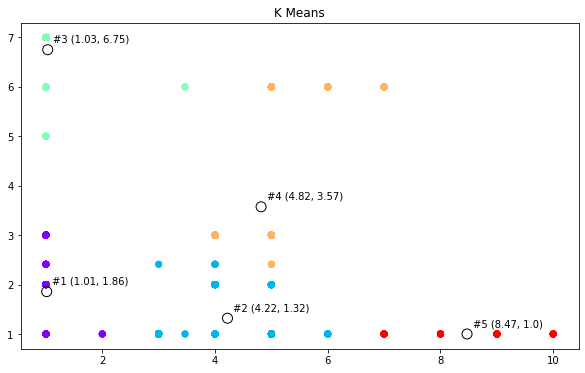

In [31]:
f, ax1 = plt.subplots(1, sharey=True, figsize=(10, 6))
ax1.set_title('K Means')
ax1.scatter(df2['cap-color-rate'], df2['stalk-color-above-ring-rate'],
            c=kmeans.labels_, cmap='rainbow')
ax1.scatter(mean_x, mean_y, facecolors='none', edgecolors='k', s=100)

for i in range(5):
    ax1.annotate(f"#{i+1} ({mean_x[i].round(2)}, {mean_y[i].round(2)})", (mean_x[i]+0.1, mean_y[i]+0.15))